<a href="https://colab.research.google.com/github/harshs-data/Exploratory-Data-Analysis/blob/main/EDA_studend_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df.shape

(649, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [9]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [10]:
# There is no null value in any dataset.

Text(0, 0.5, 'Count')

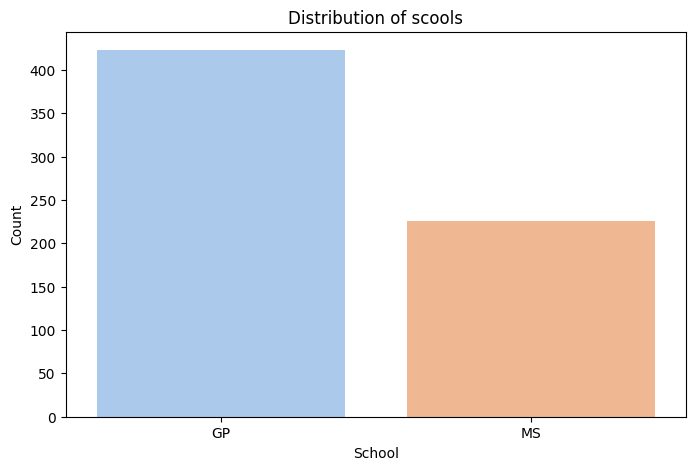

In [11]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'school', data = df, palette = 'pastel')
plt.title('Distribution of scools')
plt.xlabel('School')
plt.ylabel('Count')

<Axes: xlabel='age', ylabel='Count'>

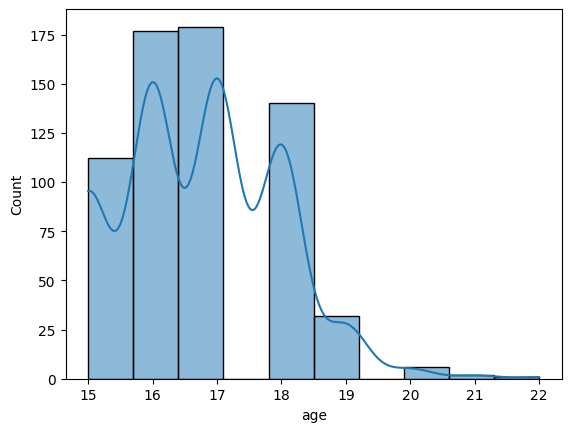

In [14]:
sns.histplot(df['age'],bins = 10, kde = True, palette = 'pastel')

In [15]:
# common age group is 16-17
# it is skewed

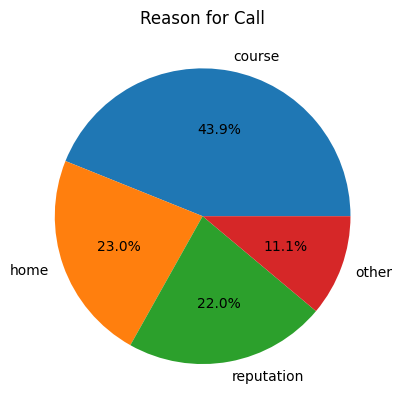

In [18]:
reason_counts = df['reason'].value_counts()
plt.pie(reason_counts, labels = reason_counts.index, autopct = '%1.1f%%')
plt.title('Reason for Call')
plt.show()

In [19]:
#common reason is course

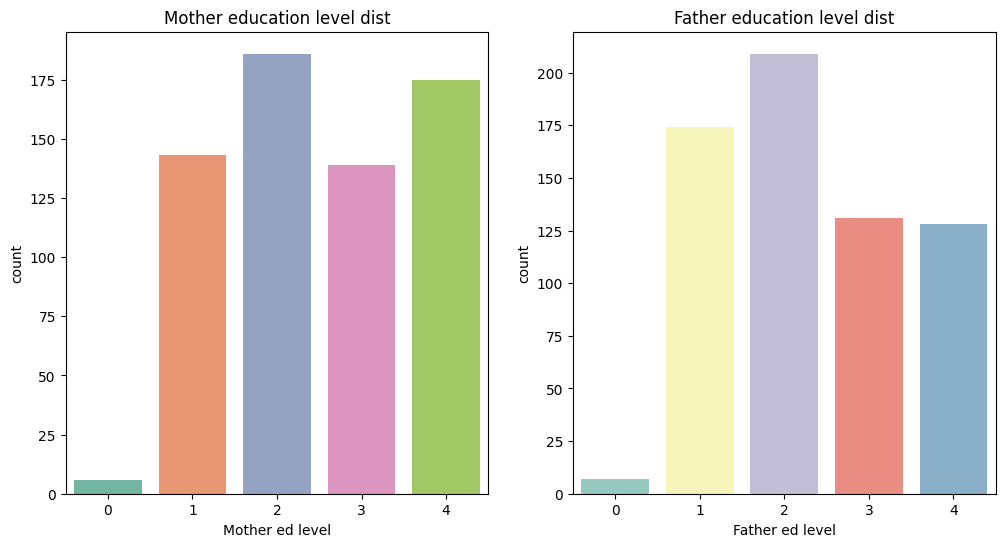

In [24]:
#Bivariate

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Medu', data = df, palette = 'Set2')
plt.xlabel('Mother ed level')
plt.ylabel('count')
plt.title('Mother education level dist')



plt.subplot(1, 2, 2)
sns.countplot(x = 'Fedu', data = df, palette = 'Set3')
plt.xlabel('Father ed level')
plt.ylabel('count')
plt.title('Father education level dist')

plt.show()

In [25]:
# Outlier detection

In [26]:
students_grades_df = df.copy()


In [27]:
from re import S
students_grades_df = students_grades_df.drop(['G1', 'G2', 'G3'], axis = 1)

In [28]:
students_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6
